<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
%pip install pandas
%pip install matplotlib
%pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\marcu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


C:\Users\marcu\AppData\Local\Temp\ipykernel_20380\1787788358.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compensation_cleaned, color='blue', shade=True, label='Density')


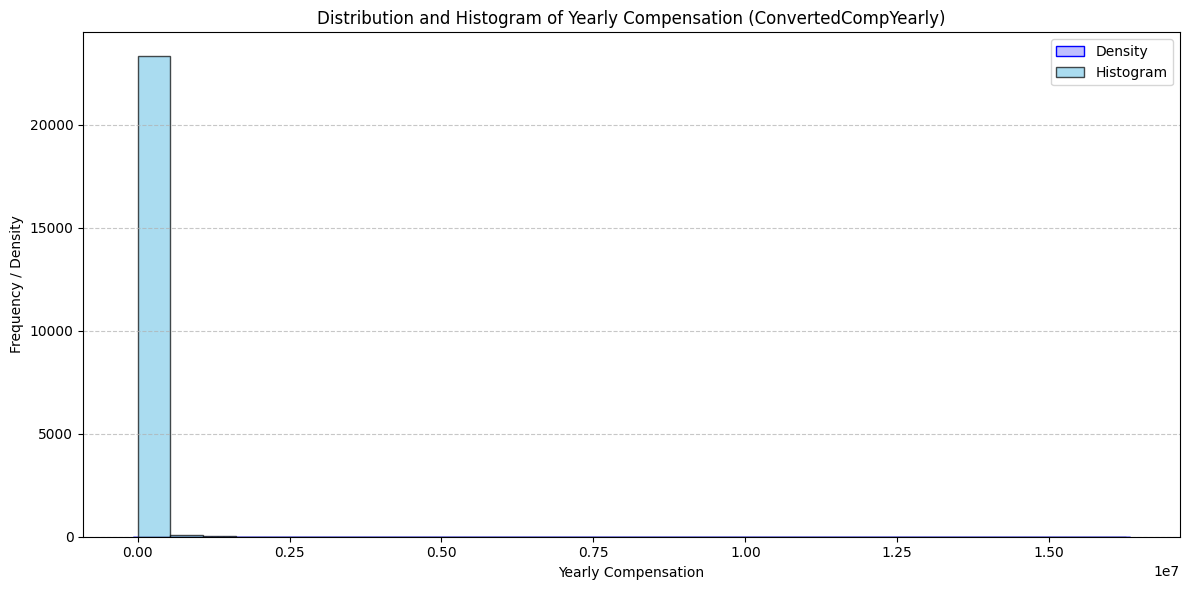

In [4]:
## Write your code here
compensation_cleaned = df['ConvertedCompYearly'].dropna()
# Plot the distribution and histogram for cleaned 'ConvertedCompYearly'
plt.figure(figsize=(12, 6))

# Distribution plot (density plot)
sns.kdeplot(compensation_cleaned, color='blue', shade=True, label='Density')

# Histogram
plt.hist(compensation_cleaned, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

plt.title('Distribution and Histogram of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency / Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
## Write your code here
# Filter the data for respondents with "Employed, full-time" status
full_time_employed = df[df['Employment'] == "Employed, full-time"]

# Calculate the median compensation for these respondents
median_compensation_full_time = full_time_employed['ConvertedCompYearly'].median()

median_compensation_full_time


69814.0

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



C:\Users\marcu\AppData\Local\Temp\ipykernel_20380\2176048325.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Country', y='ConvertedCompYearly', palette='Set3')


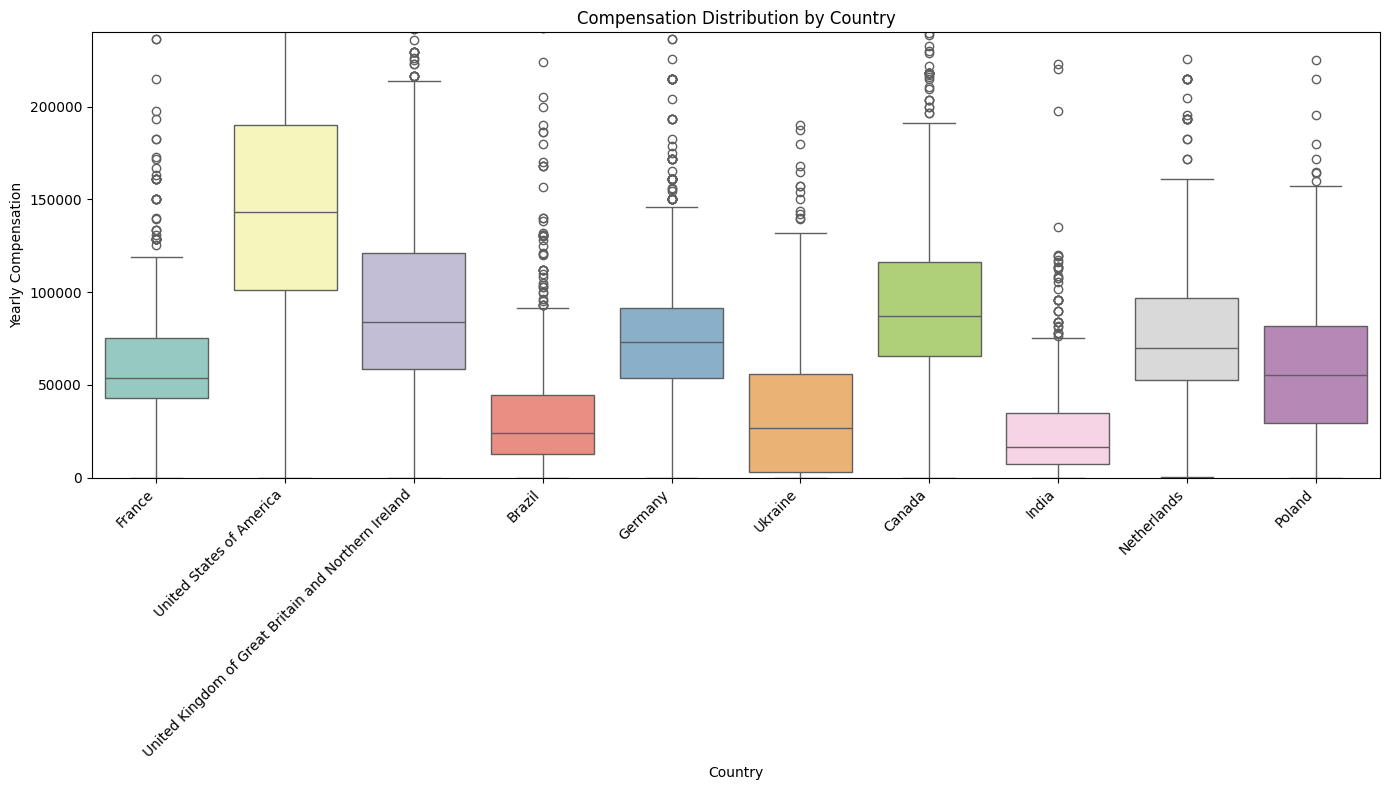

In [6]:
## Write your code here
# Filter the data to include valid compensation and country values
compensation_country_data = df[['Country', 'ConvertedCompYearly']].dropna()
compensation_country_data['ConvertedCompYearly'] = pd.to_numeric(compensation_country_data['ConvertedCompYearly'], errors='coerce')
compensation_country_data = compensation_country_data.dropna()

# Focus on the top 10 countries by number of respondents for clarity
top_countries = compensation_country_data['Country'].value_counts().head(10).index
filtered_data = compensation_country_data[compensation_country_data['Country'].isin(top_countries)]

# Create a box plot to compare compensation distributions by country
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='Country', y='ConvertedCompYearly', palette='Set3')
plt.title('Compensation Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, filtered_data['ConvertedCompYearly'].quantile(0.95))  # Limit y-axis for better visualization of trends
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [7]:
## Write your code here
# Calculate the IQR for 'ConvertedCompYearly' to identify outliers
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1

# Determine bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new DataFrame by removing outliers
refined_df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Verify the size of the refined dataset
refined_df.shape


(22457, 114)

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


C:\Users\marcu\AppData\Local\Temp\ipykernel_20380\247342220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['WorkExp'] = pd.to_numeric(refined_df['WorkExp'], errors='coerce')
C:\Users\marcu\AppData\Local\Temp\ipykernel_20380\247342220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['JobSatPoints_1'] = pd.to_numeric(refined_df['JobSatPoints_1'], errors='coerce')


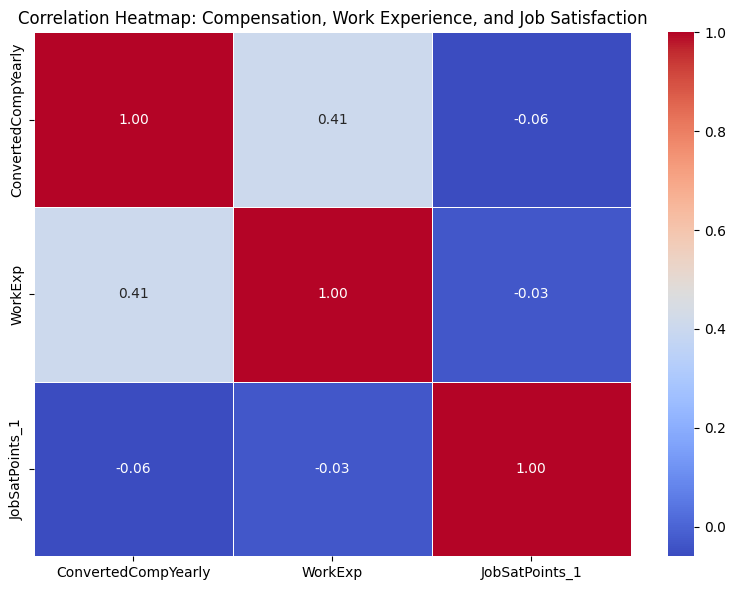

In [8]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure relevant columns are numeric
refined_df['WorkExp'] = pd.to_numeric(refined_df['WorkExp'], errors='coerce')
refined_df['JobSatPoints_1'] = pd.to_numeric(refined_df['JobSatPoints_1'], errors='coerce')

# Select columns for correlation analysis
correlation_columns = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
correlation_data = refined_df[correlation_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


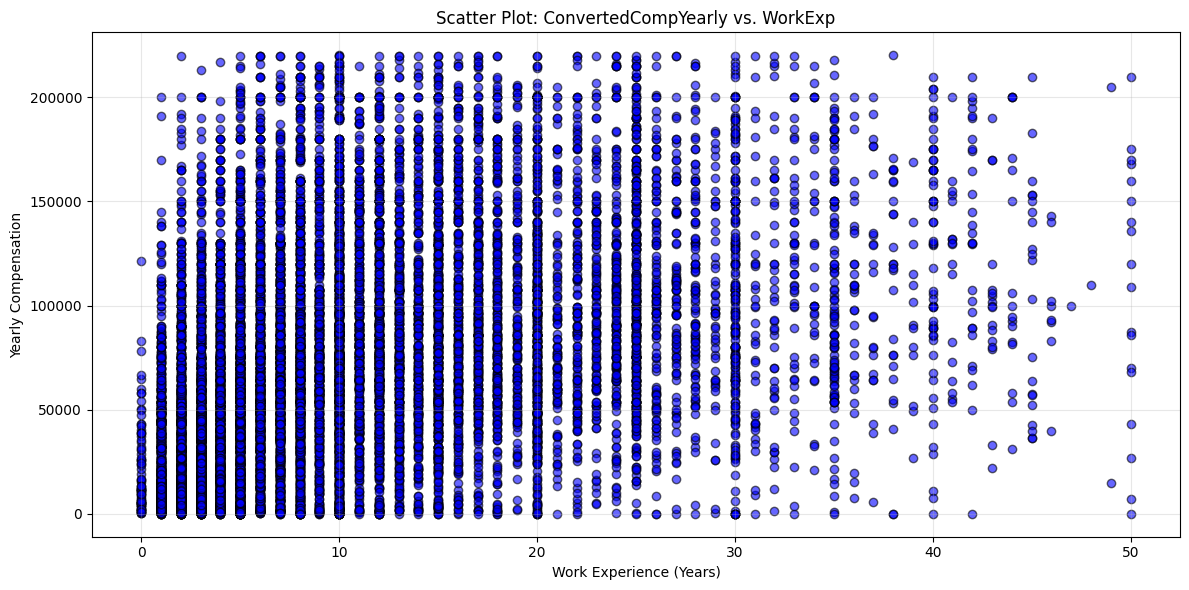

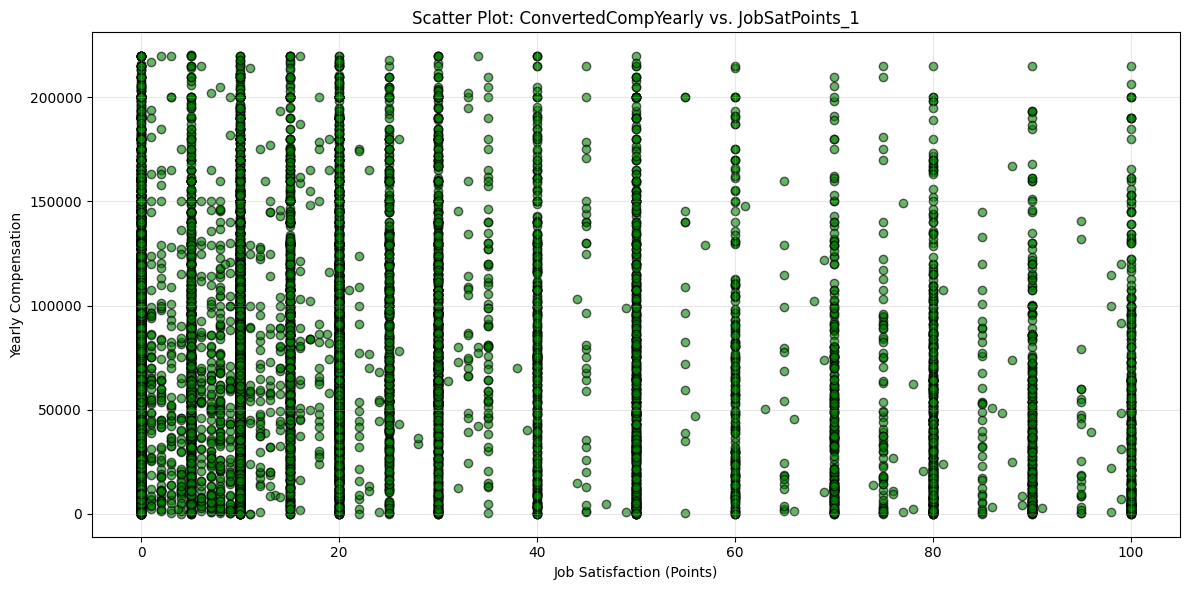

In [9]:
## Write your code here
# Scatter plot for ConvertedCompYearly vs. WorkExp
plt.figure(figsize=(12, 6))
plt.scatter(refined_df['WorkExp'], refined_df['ConvertedCompYearly'], alpha=0.6, color='blue', edgecolor='k')
plt.title('Scatter Plot: ConvertedCompYearly vs. WorkExp')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Scatter plot for ConvertedCompYearly vs. JobSatPoints_1
plt.figure(figsize=(12, 6))
plt.scatter(refined_df['JobSatPoints_1'], refined_df['ConvertedCompYearly'], alpha=0.6, color='green', edgecolor='k')
plt.title('Scatter Plot: ConvertedCompYearly vs. JobSatPoints_1')
plt.xlabel('Job Satisfaction (Points)')
plt.ylabel('Yearly Compensation')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
